## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

# Step 0: Load The Data

In [1]:
# Load pickled data
import cv2
import csv
import time
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import matplotlib.image as mpimg

EPOCHS = 15
BATCH_SIZE = 32

training_file = './train.p'
validation_file='./valid.p'
testing_file =  './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:

n_train = len(y_train)

n_test = len(y_test)


image_shape = X_train.shape


n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =",len(y_valid))
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (34799, 32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s).

This is the distribution of the training data
These are the given classes of traffic signs
1


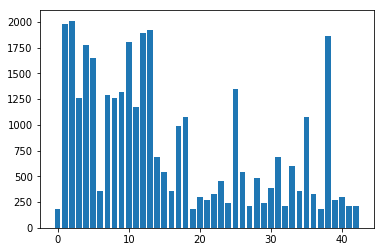

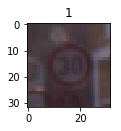

2


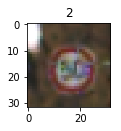

3


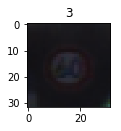

4


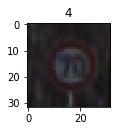

5


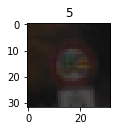

6


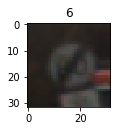

7


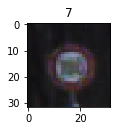

8


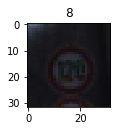

9


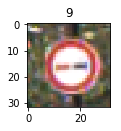

10


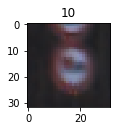

11


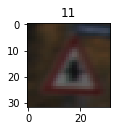

12


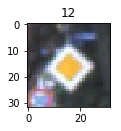

13


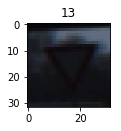

14


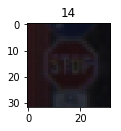

15


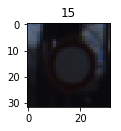

16


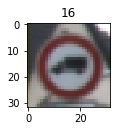

17


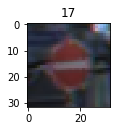

18


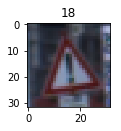

19


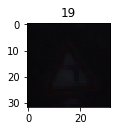

20


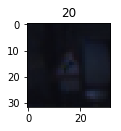

21


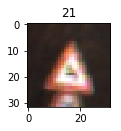

22


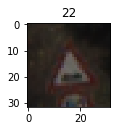

23


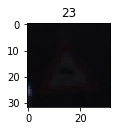

24


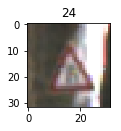

25


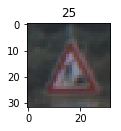

26


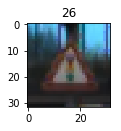

27


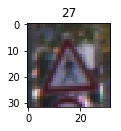

28


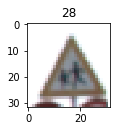

29


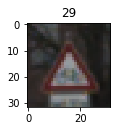

30


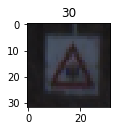

31


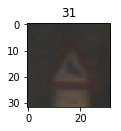

32


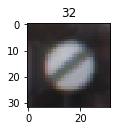

33


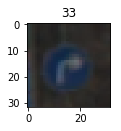

34


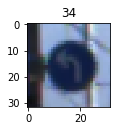

35


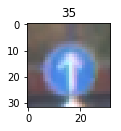

36


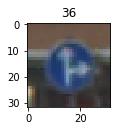

37


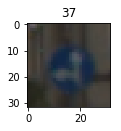

38


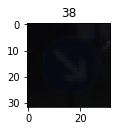

39


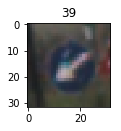

40


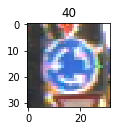

41


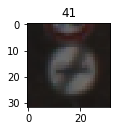

42


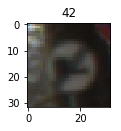

In [3]:
### Data exploration visualization code goes here.

# Visualizations will be shown in the notebook.
#%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
LabelFreq = [None] * n_classes
count=0
print('This is the distribution of the training data')
for index in range(0,n_classes):  
    for k in range(0,n_train):
        if(y_train[k]==index):
            count+=1           
    LabelFreq[index]=count
    count = 0    
plt.bar(range(0,n_classes),LabelFreq)

print('These are the given classes of traffic signs')
for index in range(1,n_classes+1):
    for k in range(0,len(y_train)):
        if(y_train[k]==index):
            print(index)
            image = X_train[k].squeeze()
            plt.figure(figsize=(20,20))
            plt.subplot(11,4,index)
            plt.title(index)
            plt.imshow(image)
            plt.show()
            break
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).


### Pre-process the Data Set (normalization, grayscale, etc.)

In [4]:
### Preprocess the data here. 
def prep(x):   
    
    x=tf.image.resize_image_with_crop_or_pad(x,30,30)
    x=tf.divide(x,255.0)
    x=tf.subtract(x,0.5)
    

    return(x)


### Model Architecture

In [24]:

def LeNet(x): 
    x=prep(x)
    mu = 0
    sigma = 0.1
    
   # SOLUTION: Layer 1: Convolutional. Input = 30x30x3. Output = 24x24x7.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(7, 7, 3, 5), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(5))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.dropout(conv1, keep_prob) 
    conv1 = tf.image.resize_images(conv1, [23,23])
    
    #LAYER 1(2) = convolutional, input = 30x30x3, Output = 22x22x5
    conv1_W2 = tf.Variable(tf.truncated_normal(shape=(9, 9, 3, 7), mean = mu, stddev = sigma))
    conv1_b2 = tf.Variable(tf.zeros(7))
    conv12   = tf.nn.conv2d(x, conv1_W2, strides=[1, 1, 1, 1], padding='VALID') + conv1_b2
    conv12 = tf.nn.dropout(conv12, keep_prob)
    conv12 = tf.image.resize_images(conv12, [23,23])
   
    #Layer 1 and Layer1(2) are concatenated, Output = 23x23x12
    conv1 = tf.concat([conv1,conv12],3)
    conv1 = tf.nn.relu(conv1)
   
    conv1_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 12, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(conv1, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b    
    conv1 = tf.nn.dropout(conv1, keep_prob)
    conv1 = tf.nn.relu(conv1)
     
    

    # SOLUTION: Layer 2: Convolutional. Input = 23x23x12. Output = 16x16x25.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(8, 8, 12, 25), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(25))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b    
    conv2 = tf.nn.dropout(conv2, keep_prob)  
    conv2 = tf.image.resize_images(conv2, [17,17])
    
    # SOLUTION: Layer 2(2): Convolutional. Input = 23x23x12. Output = 18x18x23.
    conv2_W2 = tf.Variable(tf.truncated_normal(shape=(6, 6, 12, 23), mean = mu, stddev = sigma))
    conv2_b2 = tf.Variable(tf.zeros(23))
    conv22   = tf.nn.conv2d(conv1, conv2_W2, strides=[1, 1, 1, 1], padding='VALID') + conv2_b2
    conv22 = tf.nn.dropout(conv22, keep_prob) 
    conv22 = tf.image.resize_images(conv22, [17,17])
    
    #Concatenation. Output = 17x17x48
    conv2 = tf.concat([conv2,conv22],3)
    conv2 = tf.nn.relu(conv2)
    
    #Pooling, output =8x8x48
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 8x8x48. Output =3072.
    fc0   = flatten(conv2)
   # fc0 = tf.nn.dropout(fc0, keep_prob)
    # SOLUTION: Layer 3: Fully Connected. Input = 3072. Output = 200.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(3072, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
   # fc1 = tf.nn.dropout(fc1, keep_prob)
    # SOLUTION: Layer 4: Fully Connected. Input = 200. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
   # fc2 = tf.nn.dropout(fc2, keep_prob)
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [25]:

### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

keep_prob = tf.placeholder(tf.float32)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate*(9.0/10.0))
training_operation = optimizer.minimize(loss_operation)

In [26]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [27]:
def evaluate(X_data, y_data,sess):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [33]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
          
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.8})
            
            
        validation_accuracy = evaluate(X_valid, y_valid,sess)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    
    

Training...

EPOCH 1 ...
Validation Accuracy = 0.907

EPOCH 2 ...
Validation Accuracy = 0.937

EPOCH 3 ...
Validation Accuracy = 0.944

EPOCH 4 ...
Validation Accuracy = 0.957

EPOCH 5 ...
Validation Accuracy = 0.958

EPOCH 6 ...
Validation Accuracy = 0.955

EPOCH 7 ...
Validation Accuracy = 0.956

EPOCH 8 ...
Validation Accuracy = 0.959

EPOCH 9 ...
Validation Accuracy = 0.951

EPOCH 10 ...
Validation Accuracy = 0.946

EPOCH 11 ...
Validation Accuracy = 0.950

EPOCH 12 ...
Validation Accuracy = 0.955

EPOCH 13 ...
Validation Accuracy = 0.962

EPOCH 14 ...
Validation Accuracy = 0.957

EPOCH 15 ...
Validation Accuracy = 0.963

Model saved


In [34]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test,sess)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    #92.7 
    #changing dropout rate to 0.75, the result is : 93.8
    #changing dropout rate to 0.7, the result is : 94.2
    #changing dropout rate to 0.6, the result is : 94.1
    #changing adamRate depreceation to -0.00025 and DP rate to 0.7, the result is : 93.5
    #changing adamRate depreceation to -0.00015  the result is : 93.4
    #changing adamRate to -0.0002 , the result is 93.7
    
    #adamRate decreases by 10% each time, DP is 0.8, the result is : 94.9, MASSIVE IMPROVEMENT
    #adamRate decreases by 15% each time, DP is 0.7, and we've added dropout to the last 3 layers as well = 92.9
    #back to step before, Adam decay is 15% now. DP = 0.8, no extra DP layers. and we've removed DP from layer2 as well, result = 94
    #Adam back to 10%, DP to 0.6, result : 95.5 in JUST AN HOUR of training on a *CPU*, yes, CPU not a GPU. This result outperforms most of other projects like this in accuracy as well as in training time.
    
    #Adam = 10%, DP to 0.5, result : 94.5
    #we add DP back in layer 2,and a DP in middle 1-1 conv layer, result : 94.8
    #Adam = 10%, DP to 0.70, result : 92.6, makes me horribly sad
    #DP layers only in Layer 1, DP rate = 0.6, result should be 95.5, actual result : 93.8
    #DP layers added back in layer 2, DP layer which connects layer 1 and 2 is still commented, result : 94
    #redoing the previous one to check if things alter with different running, 94.9, they do
    #redoing with DP = 0.5, result : 93.6
    #redoing with DP = 0.75 ( this is the last time I'm doing this due to personal deadlines. Note that at one point of time
                            # we were able to get up to 95.5% accuracy), result : 94.3

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.943


---

## Step 3: Test a Model on New Images



### Load and Output the Images

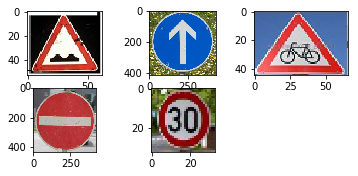

In [35]:

import csv

img1=mpimg.imread('sign1.jpg')

img2=mpimg.imread('sign2.jpg')

img3=mpimg.imread('sign3.jpg')

img4=mpimg.imread('sign4.jpg')

img5=mpimg.imread('sign5.jpg')

plt.subplot(3,3,1)
plt.imshow(img1)
plt.subplot(3,3,2)
plt.imshow(img2)
plt.subplot(3,3,3)
plt.imshow(img3)
plt.subplot(3,3,4)
plt.imshow(img4)
plt.subplot(3,3,5)
plt.imshow(img5)
plt.show()


img1= cv2.resize(img1, (32,32))
img2= cv2.resize(img2, (32,32))
img3= cv2.resize(img3, (32,32))
img4= cv2.resize(img4, (32,32))
img5= cv2.resize(img5, (32,32))

images = np.zeros((5,32,32,3))
images[0] = img1
images[1] = img2
images[2] = img3
images[3] = img4
images[4] = img5
labels = np.array([22, 35, 29, 17, 1])

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from .\lenet
New Accuracy = 1.000
The given traffic signs are : 


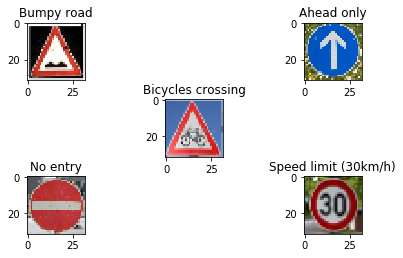

In [57]:


softmaxProb = tf.placeholder(tf.float32, (1,43))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    new_accuracy = evaluate(images, labels, sess)
    print("New Accuracy = {:.3f}".format(new_accuracy))
    softmaxProb = sess.run(tf.nn.softmax(logits), feed_dict={x: images,y:labels, keep_prob: 1.0})  
    signs_top_5 = sess.run(tf.nn.top_k(softmaxProb, k=5))
    preds = np.argmax(softmaxProb, axis=1)

signs_class=[]

with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:           
        signs_class.append((row['SignName']))
print('The given traffic signs are : ')

plt.subplot(3,5,1)
plt.imshow(img1)
plt.title(signs_class[preds[0]]);
plt.subplot(3,5,5)
plt.imshow(img2)
plt.title(signs_class[preds[1]]);
plt.subplot(3,5,8)
plt.imshow(img3)
plt.title(signs_class[preds[2]]);
plt.subplot(3,5,11)
plt.imshow(img4)
plt.title(signs_class[preds[3]]);
plt.subplot(3,5,15)
plt.imshow(img5)
plt.title(signs_class[preds[4]]);
plt.show()
    

### Analyze Performance

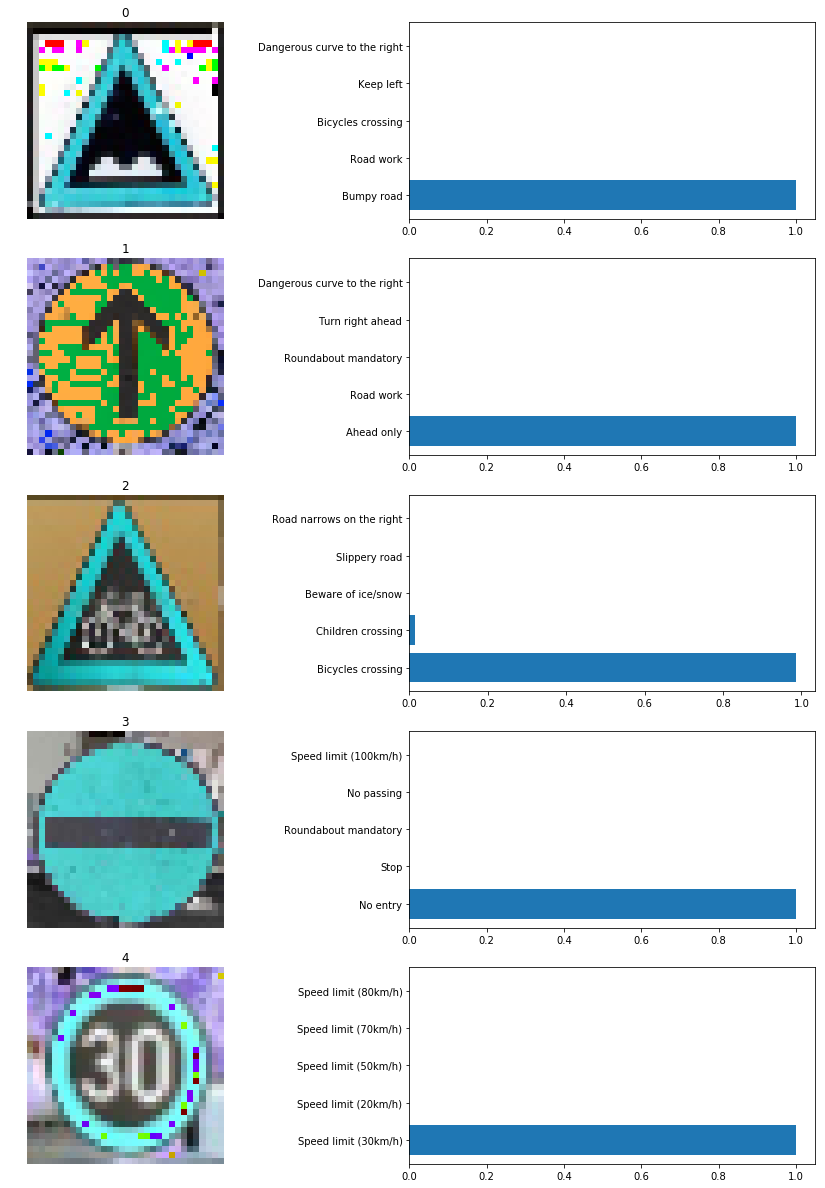

In [58]:

plt.figure(figsize=(16, 21))
for i in range(5):
    plt.subplot(5, 2, (2*i)+1)
    plt.imshow(images[i]) 
    plt.title(i)
    plt.axis('off')
    plt.subplot(5, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), signs_top_5.values[i, :])
    labs=[signs_class[j] for j in signs_top_5.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

